<a href="https://colab.research.google.com/github/sjaureguimodo/datascience-digitalhouse/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

# Setup

## Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline

from IPython.display import Image

import re

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score, KFold


import scipy.stats
from scipy.stats import chi2




print("Setup Complete")



Setup Complete


## Load data

In [2]:
df_filepath ='/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv'
df = pd.read_csv(df_filepath)


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory Data Analysis

In [3]:
#List column names
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [4]:
#Check columns data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Variables Categoricas. Operaciones.

## Check for duplicates

In [5]:
#Check duplicate rows
df[df.duplicated(keep=False)]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


No duplicate rows

In [6]:
#Check duplicate IDs
df.duplicated(subset=['CLIENTNUM']).unique()


array([False])

No duplicate IDs

## Check Unknowns

In [7]:
###Check for unknown values
df[df == 'Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We have unknown values in
- Education_Level
- Marital_Status
- Income_Category

We can later map them or filter them before building the models

In [8]:
### Check for 0 values
df[df == 0].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count              904
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon        29
Contacts_Count_12_mon        399
Credit_Limit                   0
Total_Revolving_Bal         2470
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           5
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            7
Avg_Utilization_Ratio       2470
dtype: int64

## Target variable distribution

In [9]:
###Ver la distrbucion de la variable target
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [10]:
aggdata= df.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
aggdata

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


In [11]:
labels = aggdata.Attrition_Flag
values = aggdata.CLIENTNUM

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.90,
    xanchor="left",
    x=0.20
))

## Map target variable to numeric

In [12]:
df['Attrition_Flag'] = df.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Categorical variables

### Gender

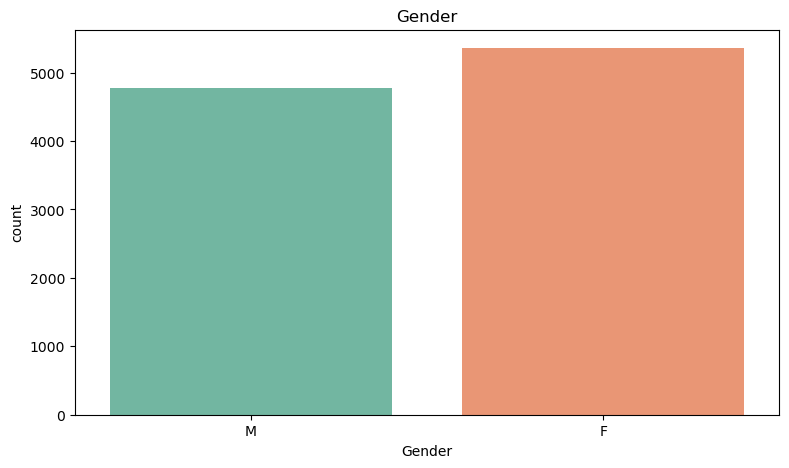

In [13]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)
plt.show()

In [14]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,0,1
0,F,0.826428,0.173572
1,M,0.853848,0.146152


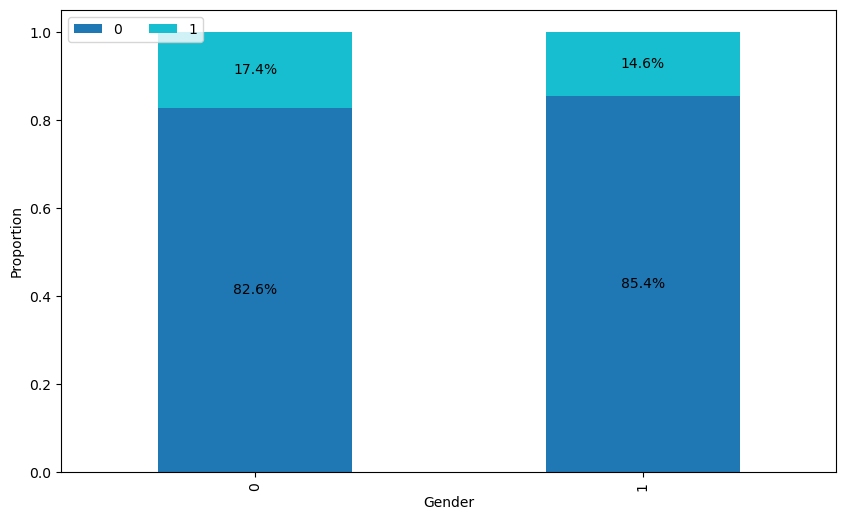

In [15]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [16]:
### Check if the difference between the two groups is statistically significant
 
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     13.866
p-value:            0.00019636
degrees of freedom: 1
expected frequencies:
 [[4497.18574109  860.81425891]
 [4002.81425891  766.18574109]]


The difference is significant

### Income

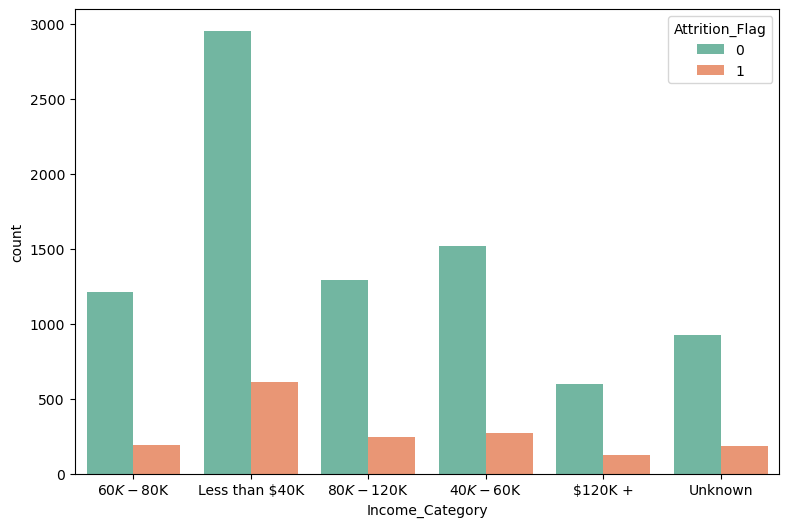

In [17]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()

In [18]:

cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,0,1
Income_Category,,
$120K +,0.826685,0.173315
$40K - $60K,0.848603,0.151397
$60K - $80K,0.865193,0.134807
$80K - $120K,0.842345,0.157655
Less than $40K,0.828138,0.171862
Unknown,0.831835,0.168165


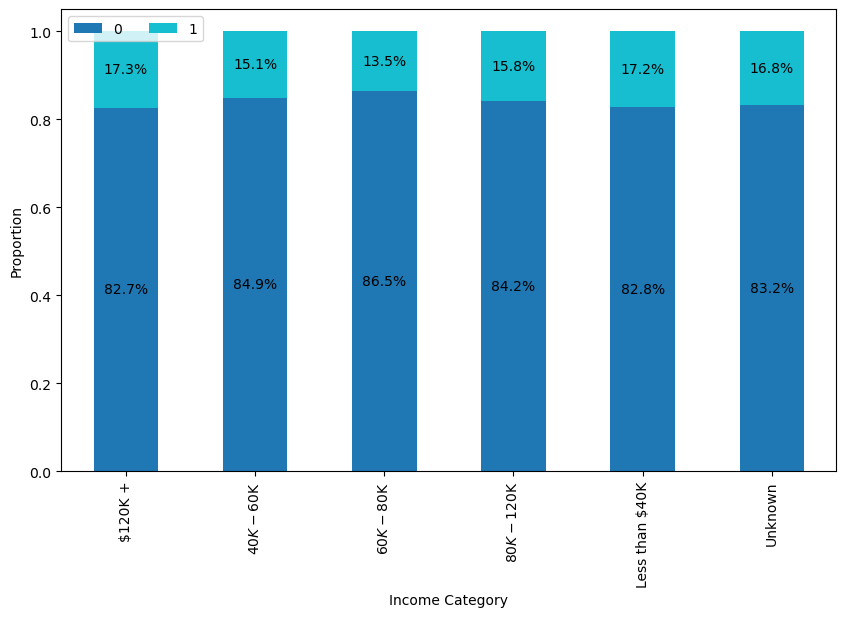

In [19]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [20]:
### Check if the difference between the income groups is statistically significant


chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     12.832
p-value:            0.025002
degrees of freedom: 5
expected frequencies:
 [[ 610.20045423  116.79954577]
 [1502.4192752   287.5807248 ]
 [1176.75520885  225.24479115]
 [1288.38747902  246.61252098]
 [2988.89108324  572.10891676]
 [ 933.34649946  178.65350054]]


We have a p-value < 0.05 so we can say that the difference between the groups is significant.
This column can be encoded to an ordinal numeric variable later.

### Marital_Status

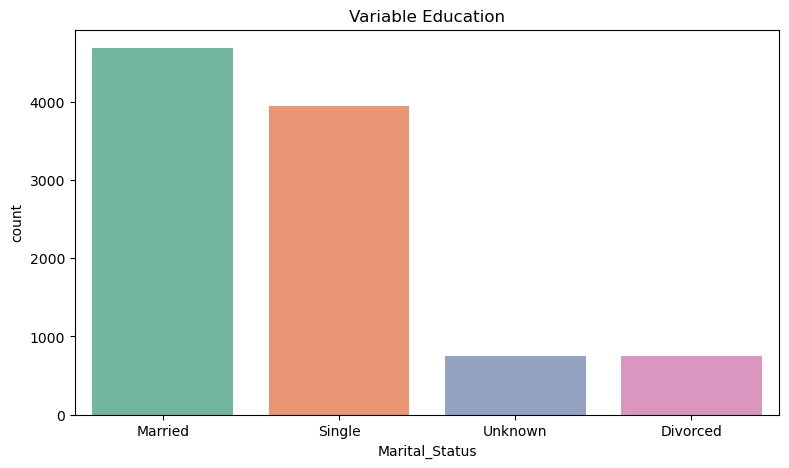

In [21]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

In [22]:
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.838235,0.161765
Married,0.848731,0.151269
Single,0.830586,0.169414
Unknown,0.827770,0.172230


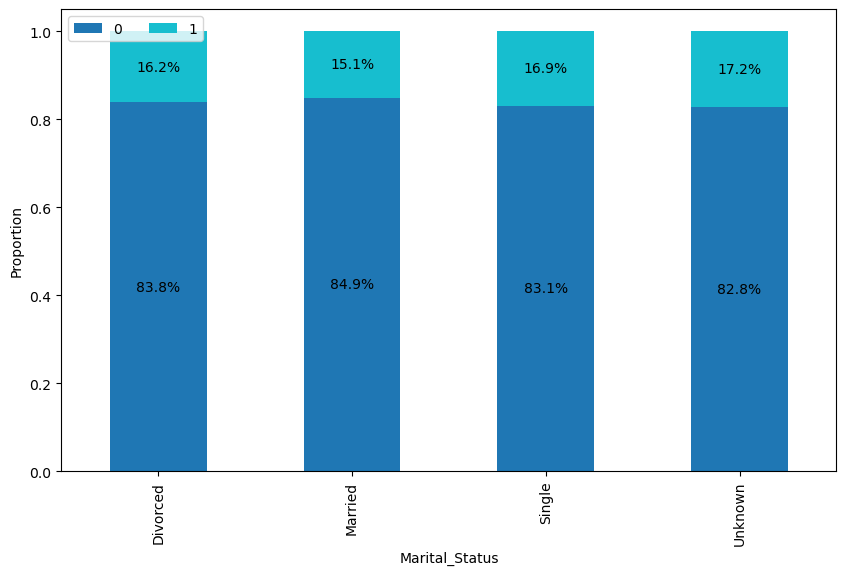

In [23]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital_Status")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [24]:
### Check if the difference between the marital status groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     6.0561
p-value:            0.10891
degrees of freedom: 3
expected frequencies:
 [[ 627.82660215  120.17339785]
 [3933.98834798  753.01165202]
 [3309.51910734  633.48089266]
 [ 628.66594253  120.33405747]]


The difference is not significant

### Card_Category

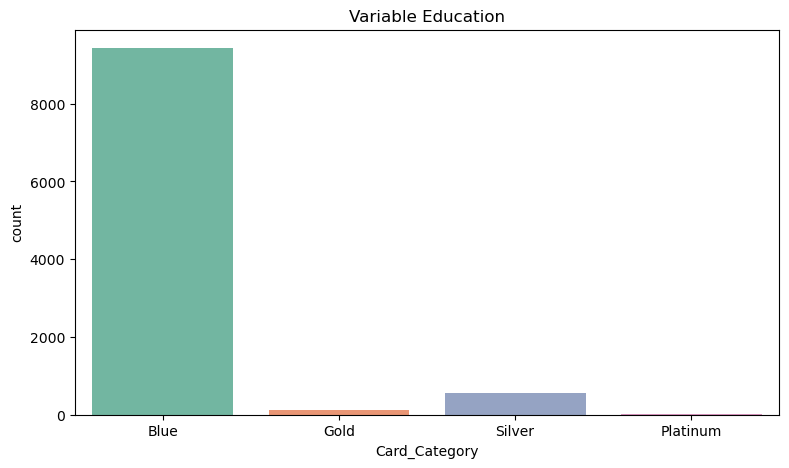

In [25]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

In [26]:
cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,0,1
Card_Category,,
Blue,0.839021,0.160979
Gold,0.818966,0.181034
Platinum,0.750000,0.250000
Silver,0.852252,0.147748


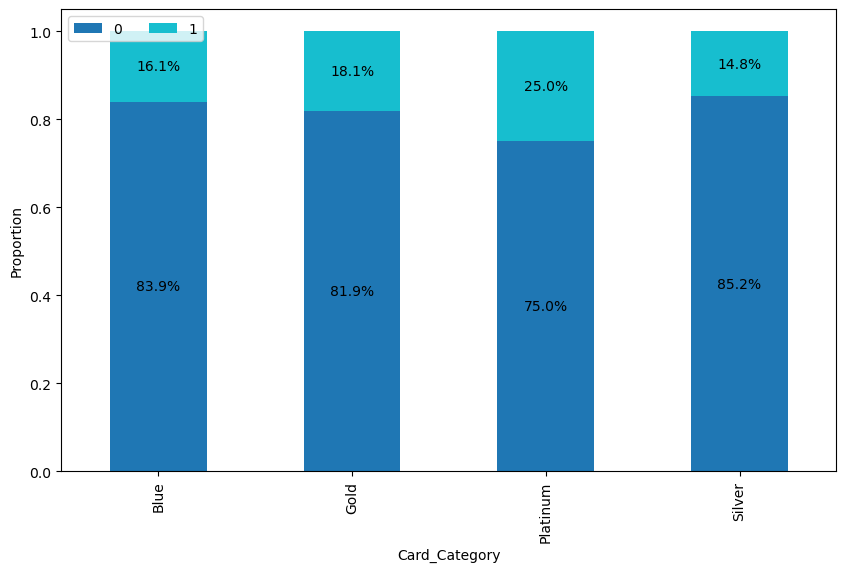

In [27]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Card_Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [28]:
### Check if the difference between the card_category groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2.2342
p-value:            0.52524
degrees of freedom: 3
expected frequencies:
 [[7.92001580e+03 1.51598420e+03]
 [9.73634838e+01 1.86365162e+01]
 [1.67868075e+01 3.21319246e+00]
 [4.65833909e+02 8.91660906e+01]]


We can see that the differences in this group are not statistically significant because of the low number of observations in some of the categories

### Education level

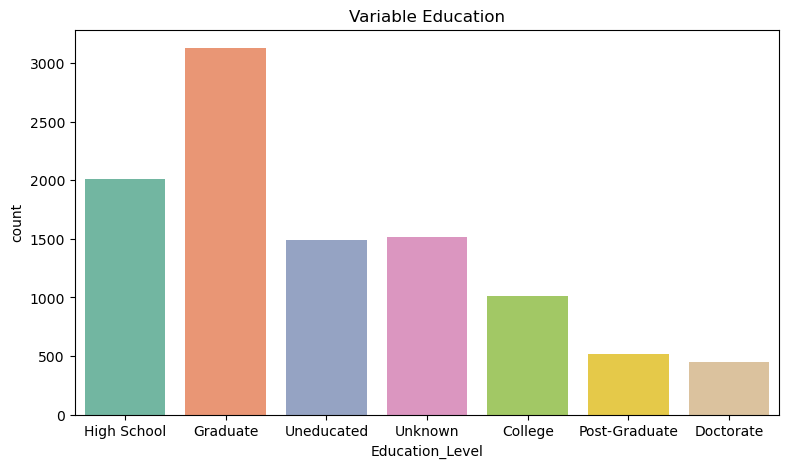

In [29]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

In [30]:
cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop



Attrition_Flag,0,1
Education_Level,,
College,0.847976,0.152024
Doctorate,0.789357,0.210643
Graduate,0.844309,0.155691
High School,0.847988,0.152012
Post-Graduate,0.821705,0.178295
Uneducated,0.840619,0.159381
Unknown,0.831468,0.168532


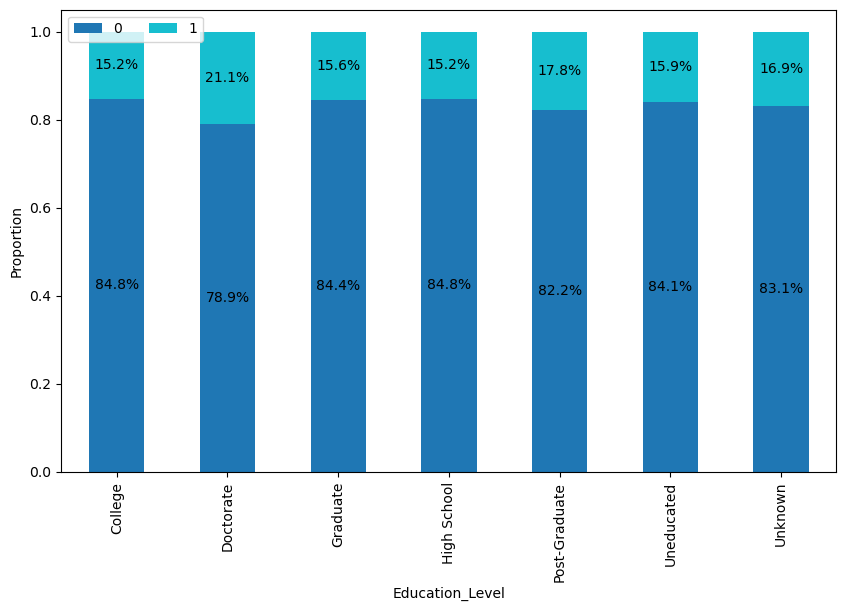

In [31]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education_Level")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [32]:
### Check if the difference between the education_level groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     12.511
p-value:            0.051489
degrees of freedom: 6
expected frequencies:
 [[ 850.25180211  162.74819789]
 [ 378.54251012   72.45748988]
 [2625.45669991  502.54330009]
 [1689.59217932  323.40782068]
 [ 433.09963464   82.90036536]
 [1248.09914091  238.90085909]
 [1274.95803298  244.04196702]]


The difference is not significant

## Numeric variables

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



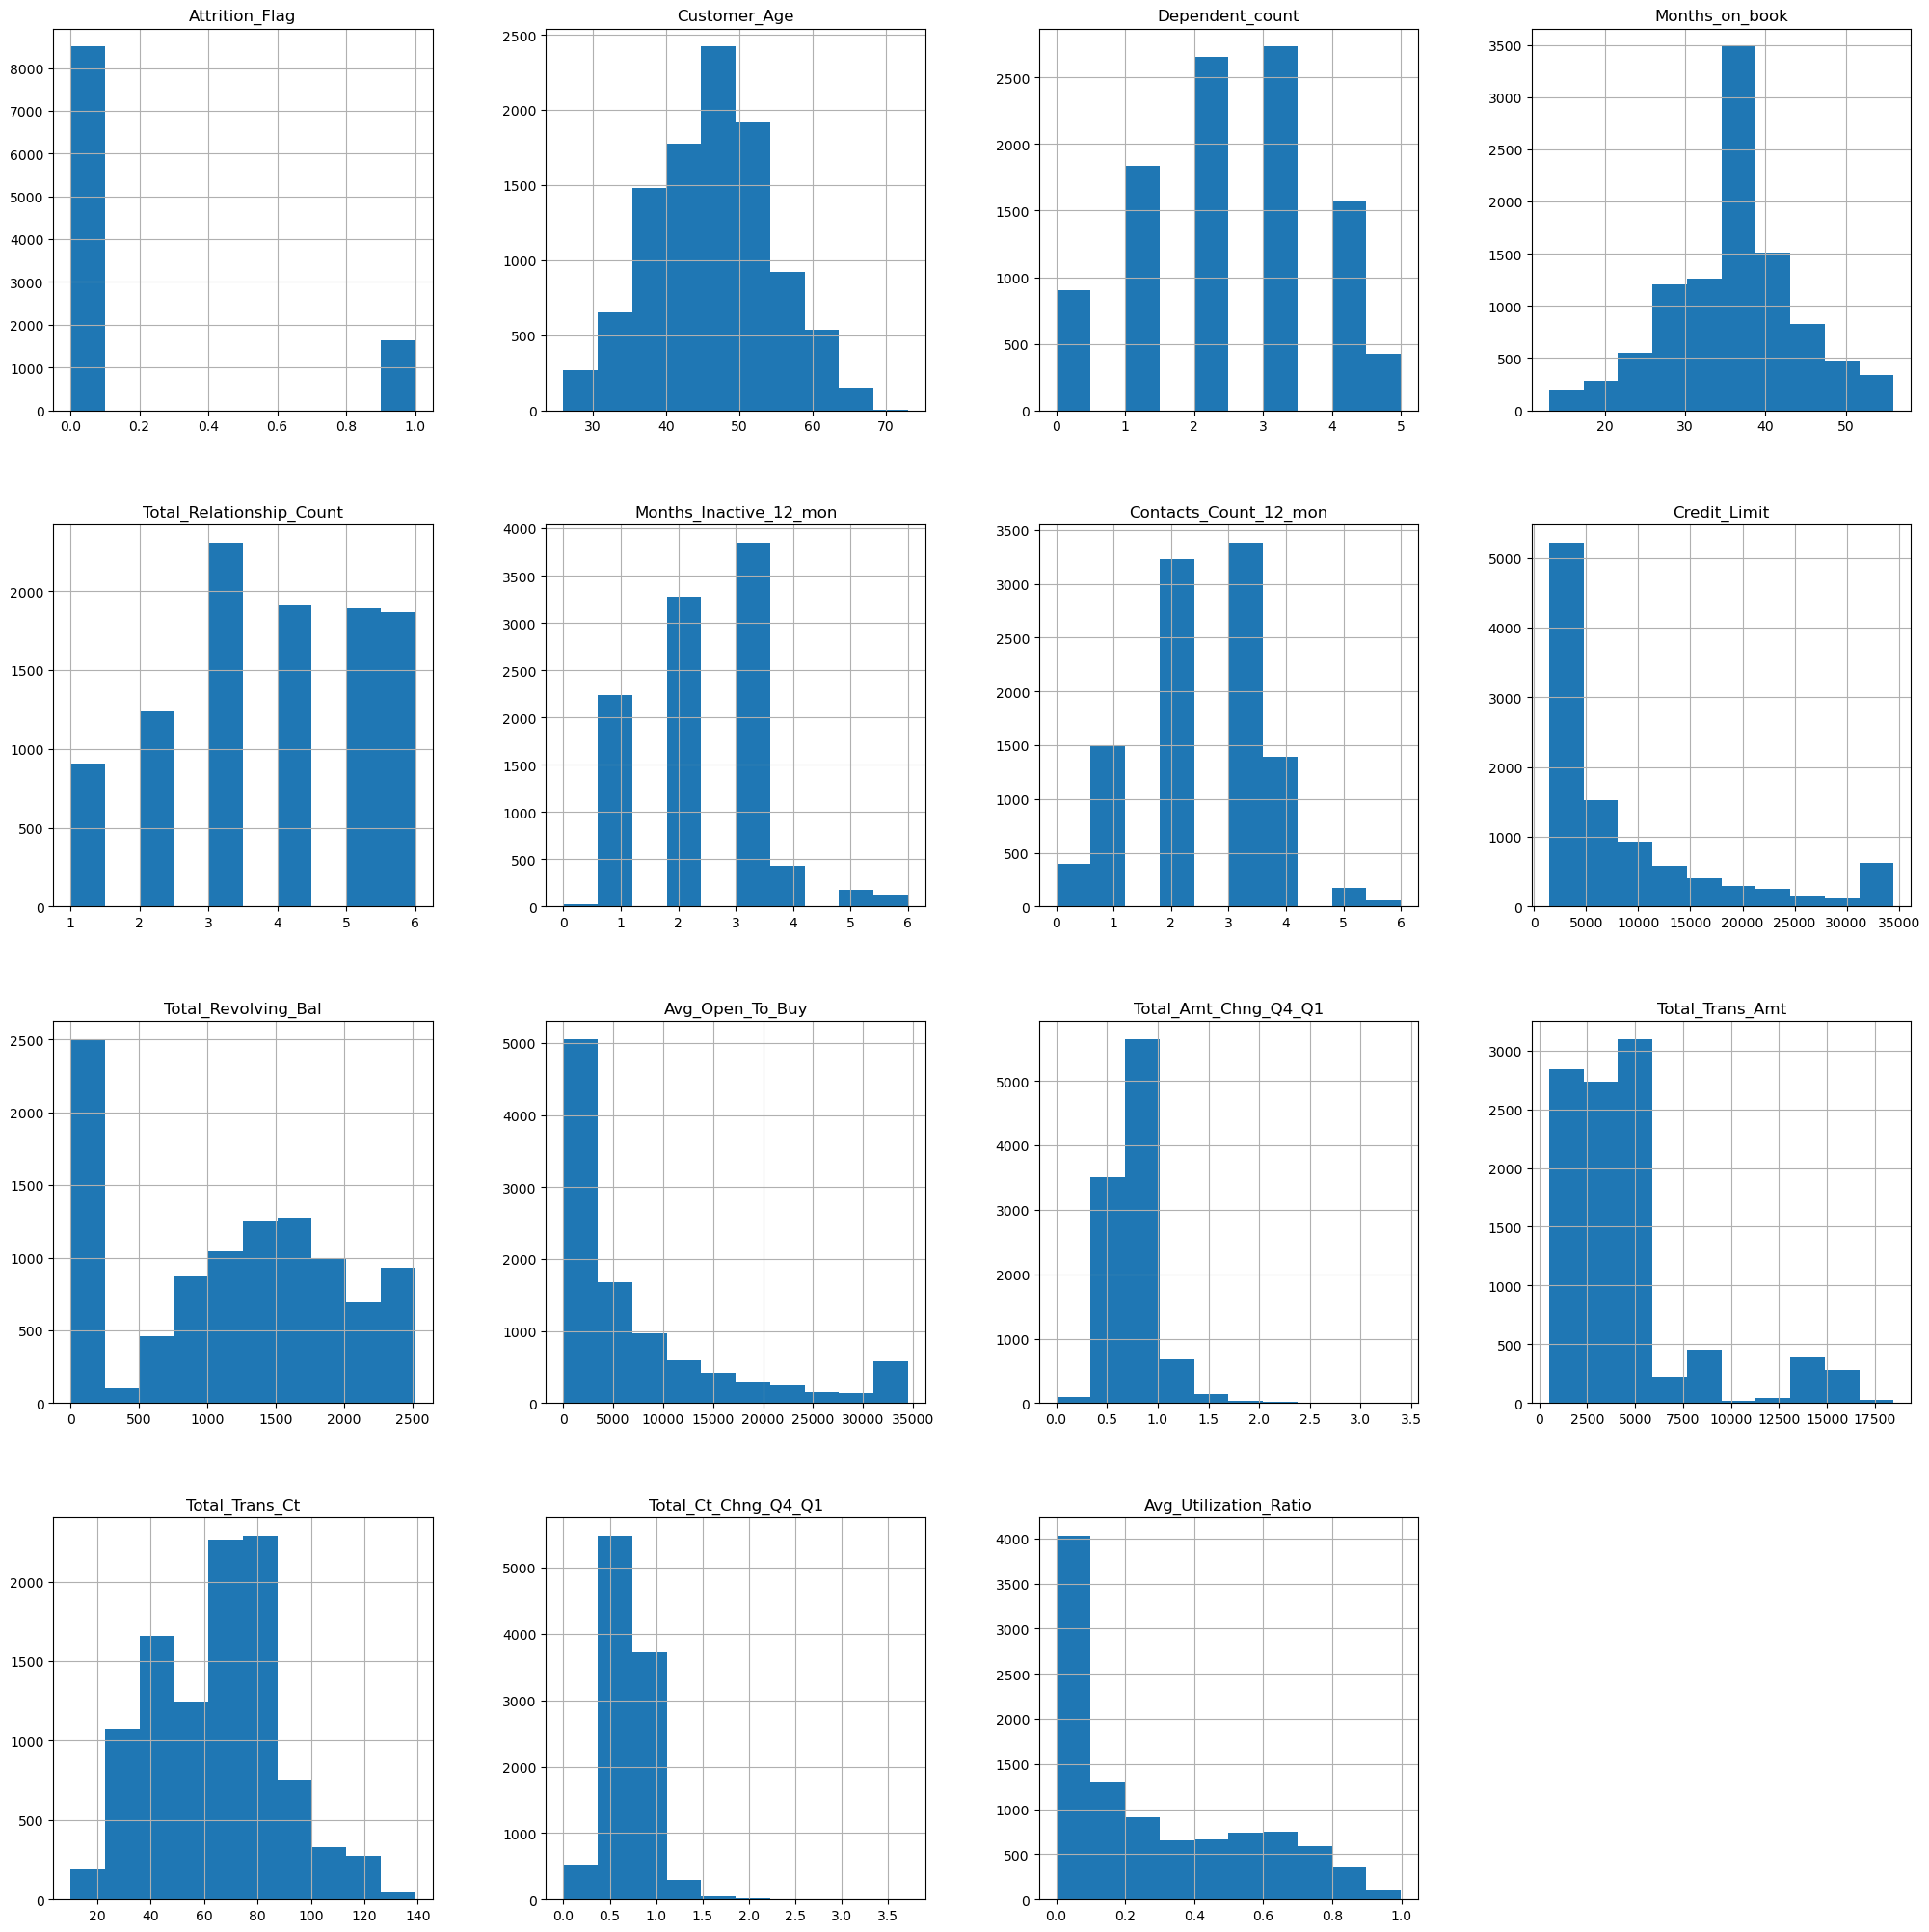

In [33]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
df.loc[:, ~df.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
fig.show()

In [34]:
df.loc[:, ~df.columns.isin(['CLIENTNUM'])].describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Correlation Matrix

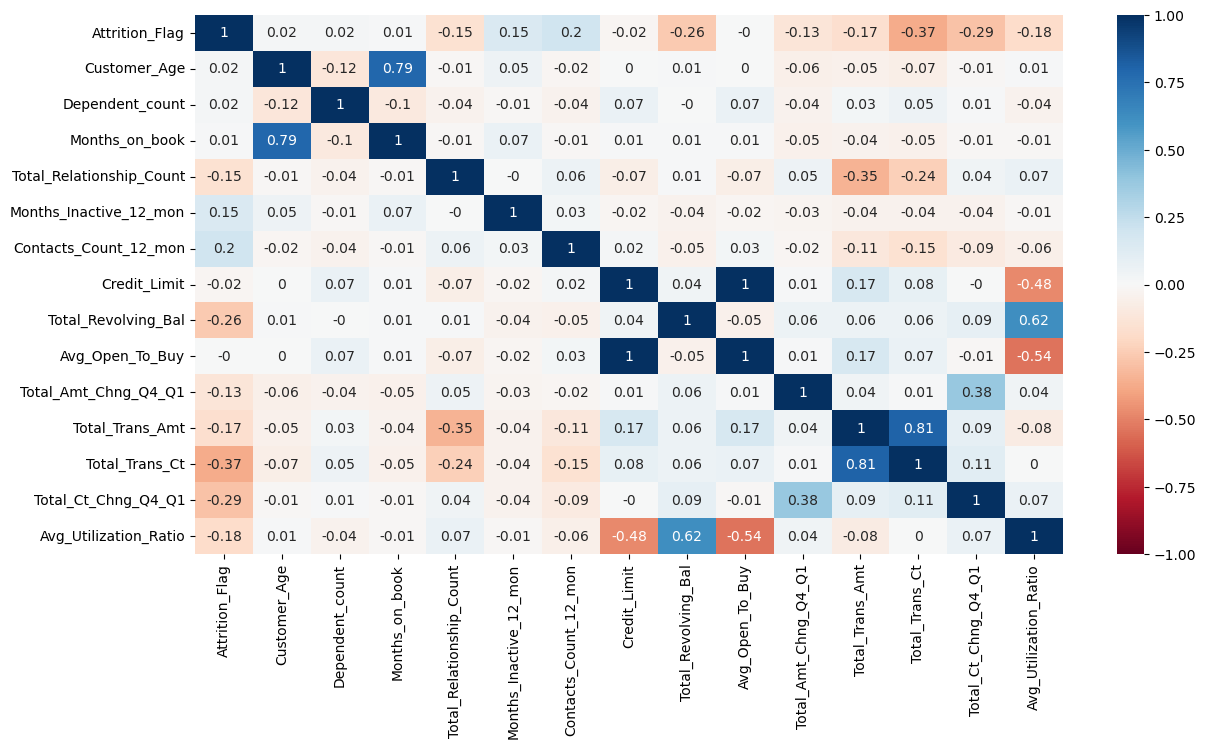

In [35]:
correlation = df.loc[:, ~df.columns.isin(['CLIENTNUM'])].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()


- We can see that Revolving_balance and avg_utilization_ratio are positively correlated.
- The avg_utilization_ratio is also negatively correlated to the credit_limit and the avg_open_to_buy
- Total_Trans_Amt and Total_Trans_Ct are also positively correlated.

### Attrition by Age Box plot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

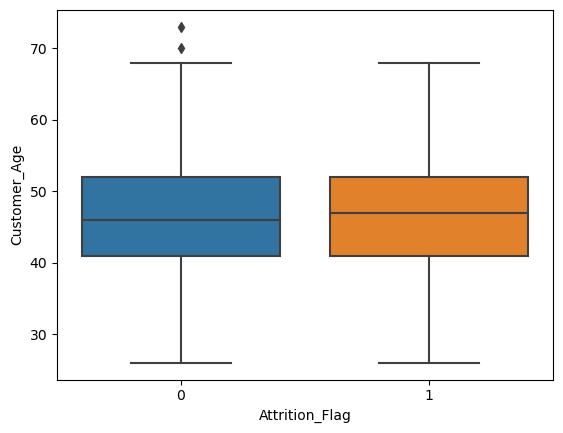

In [36]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

We don't see a difference between the two groups

### Attrition by dependent count Box plot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Dependent_count'>

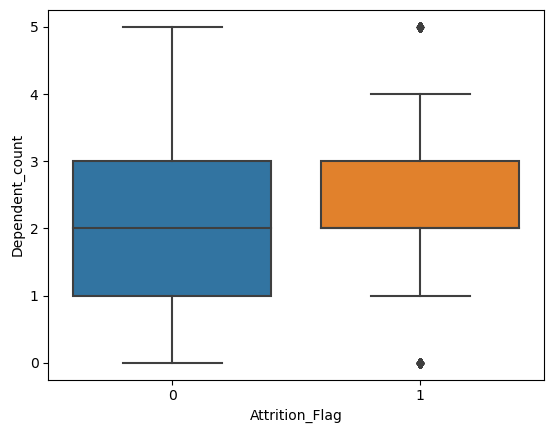

In [37]:
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)

Dependent_count can be used in the model as a predictor

### Attrition by months on book

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

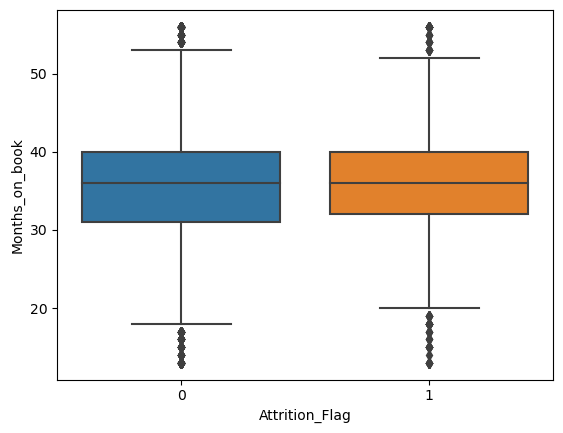

In [38]:
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)

We don't see a difference between the two groups

### Attrition by Total_Relationship_Count Box Plot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

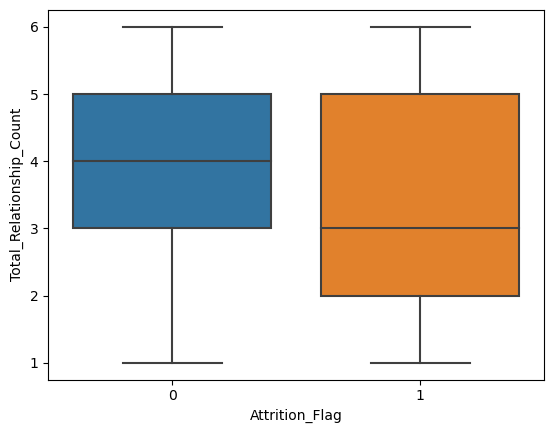

In [39]:
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Months_Inactive_12_mon Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

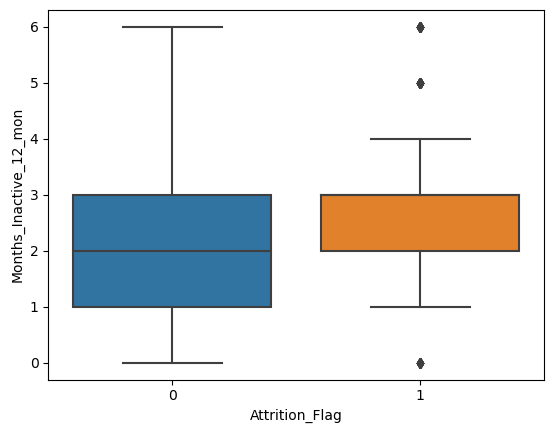

In [40]:
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Contacts_Count_12_mon Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

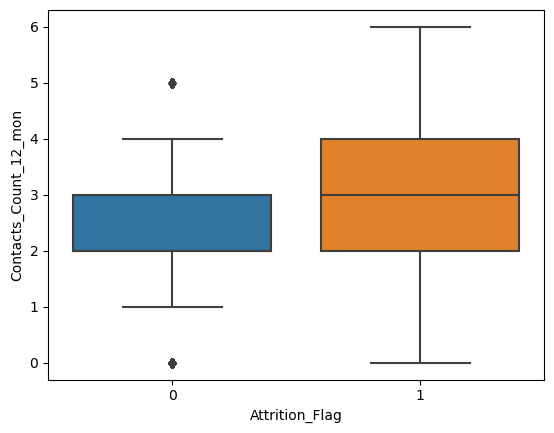

In [41]:
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Credit_Limit Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

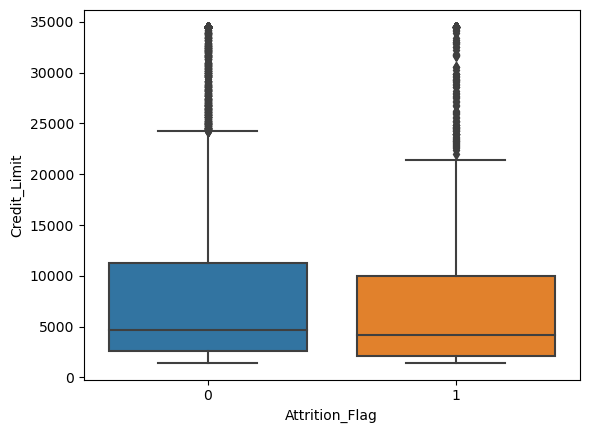

In [42]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)

We see a small difference, it may be used as a predictor. Since it is correlated with the avg_utilization_ratio we should choose one of the two

### Attrition by Total_Revolving_Bal Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

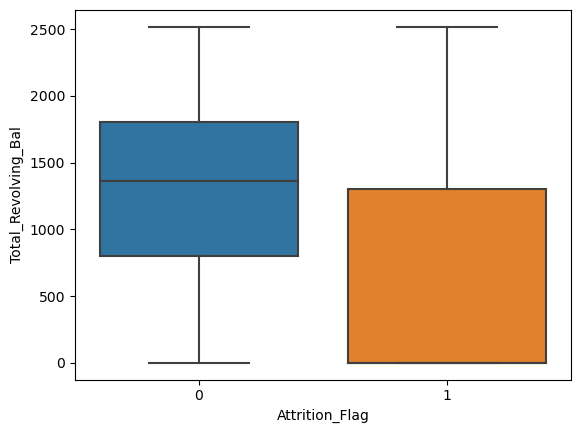

In [43]:
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df)

We see a difference and we can use this variable as a predictor

### Attrition by Avg_Open_To_Buy Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

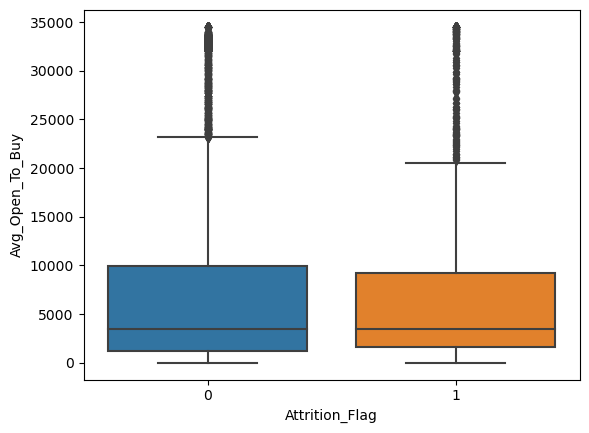

In [44]:
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df)

We don't see a difference between the two groups

### Attrtion by Total_Amt_Chng_Q4_Q1 Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

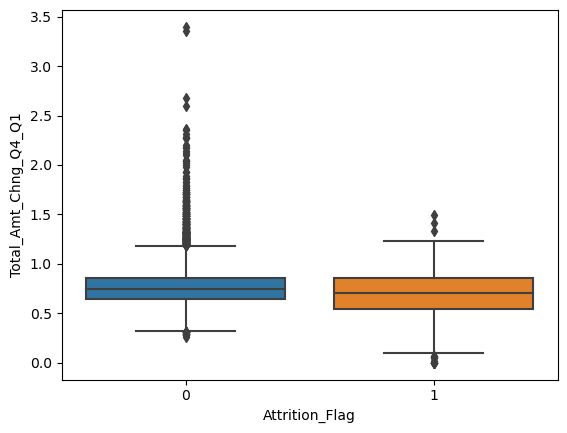

In [45]:
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df)

We preffer not to add it to the model for explainability

### Attrtion by Total_Trans_Amt Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

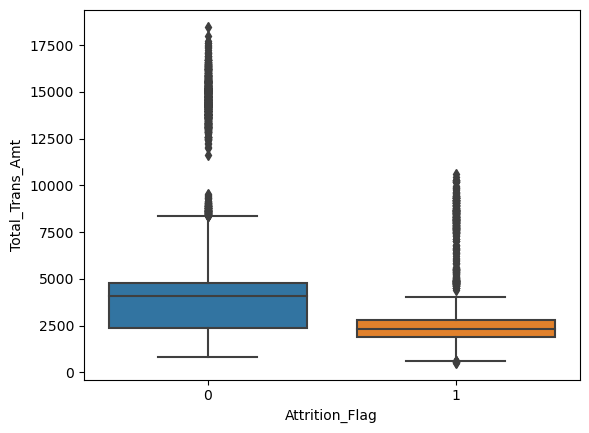

In [46]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)

We see a difference and we may use this variable as a predictor

### Attrition by Total_Trans_Ct Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

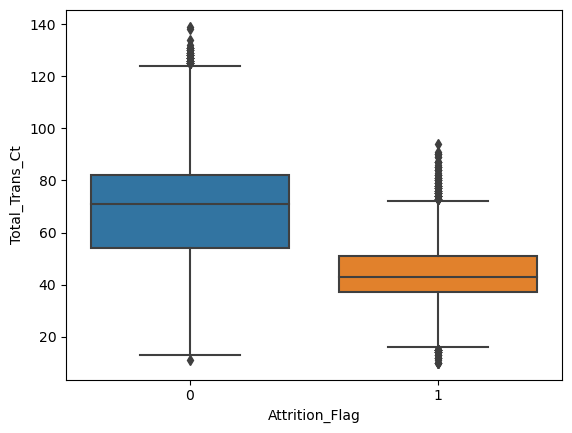

In [47]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)

We observe a significant difference between the groups, since amount and quantity of transactions are correlated, we choose this variable as predictor and discard the amount

### Attrition by Total_Ct_Chng_Q4_Q1 Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

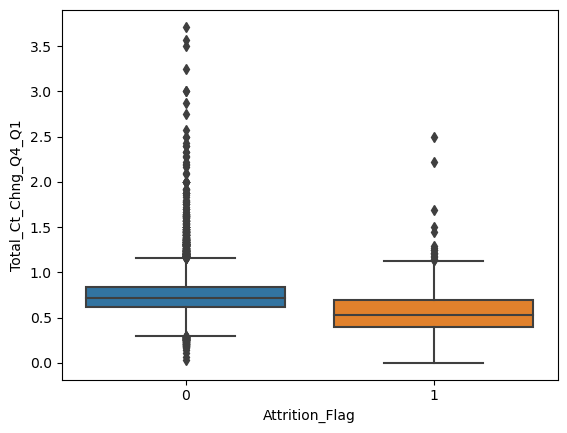

In [48]:
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df)

We preffer not to add it to the model for explainability

### Attrition by Avg_Utilization_Ratio Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

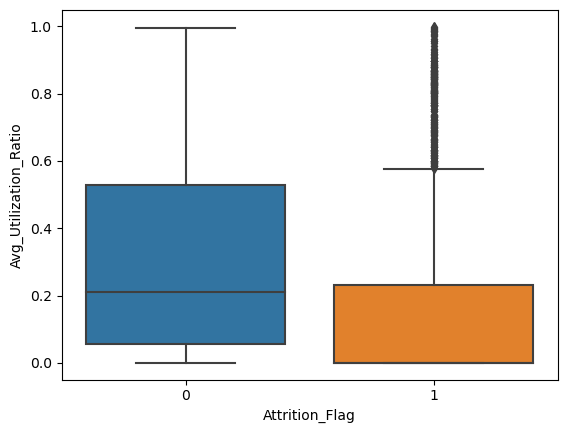

In [49]:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

We see a difference and we can use this variable as a predictor

# Select candidate variables

In [50]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Numerics

- Dependent_count
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Total_Trans_Ct
- Avg_Utilization_Ratio

## Categoricals

- Gender
- Income_Category

# Models


## Dataset preparation

### Categoricas

#### Encoding ordinal

In [51]:
Income_Category_enc = df['Income_Category']
Income_Category_enc.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [52]:
#We map unknowns to 0, which is the most repeated value
df['Income_Category'] =  df['Income_Category'].map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})

#### Onehot encoder

In [53]:
categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = df[categoricals]
enc.fit(X)
enc.categories_

[array(['F', 'M'], dtype=object)]

In [54]:
dummies = enc.transform(X).toarray()
dummies

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [55]:
dummies.shape

(10127, 1)

In [56]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [57]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Gender_F', 'Gender_M'], dtype=object)]

In [58]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Gender_M']

In [59]:
dummies_df.columns = col_names_drop_first
dummies_df

,Gender_M
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


#### Numerics

In [60]:
numericals = ['Dependent_count',
            'Total_Relationship_Count',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Trans_Ct',
            'Avg_Utilization_Ratio',
             'Income_Category']

X = df[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


#### Concatenar resultados

In [61]:
df_prep = pd.concat([dummies_df,
                     std_df
                     ], axis = 1)
df_prep

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,1.0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


## Logistic Regression

### Training

In [62]:
X = df_prep
y = df.Attrition_Flag

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [64]:
logistic_regression = LogisticRegression(penalty='none') 
logistic_regression.fit(X_train, y_train);

In [65]:
y_test_pred = logistic_regression.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
y_test_pred_proba = logistic_regression.predict_proba(X_test)
y_test_pred_proba

array([[9.65582449e-01, 3.44175509e-02],
       [8.81681203e-01, 1.18318797e-01],
       [1.88306726e-01, 8.11693274e-01],
       ...,
       [5.60789302e-01, 4.39210698e-01],
       [5.38264050e-01, 4.61735950e-01],
       [9.99170995e-01, 8.29005139e-04]])

### Evaluation

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[2048,   77],
       [ 213,  194]])

In [68]:
confusion=confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [69]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_test_pred)


0.8854660347551343

In [70]:
#Sensibilidad 
recall_score(y_test, y_test_pred)

0.47665847665847666

In [71]:
#Especificidad
specificity = TN / (TN + FP)
print(specificity)

0.963764705882353


In [72]:
#f1 score
print(f1_score(y_test, y_test_pred))

0.5722713864306784


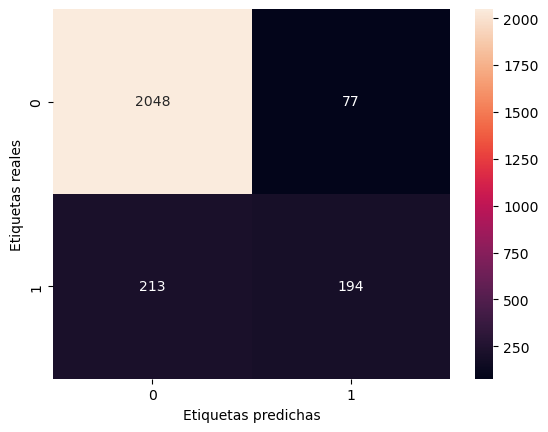

In [73]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

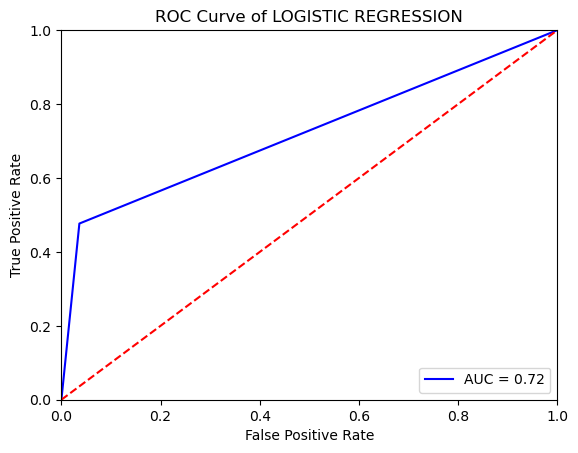

In [74]:
Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

### BASE LINE: NAIVE BAYES

In [75]:
### Pasar variables categoricas relevantes a ordinales
df1= df.copy()
print(df1['Income_Category'].unique())
df1['Income_Category'].replace(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'], 
                               [1, 2, 3, 4, 5, 99], inplace=True)


[3 1 4 2 5]


In [76]:
df1.Income_Category.unique()

array([3, 1, 4, 2, 5])

In [77]:
### Pasar variables categóricas a ordinales
print(df1['Gender'].unique())
df1['Gender'].replace(['F', 'M'], 
                    [0, 1], inplace=True)

['M' 'F']


In [78]:
df1.Gender.unique()

array([1, 0])

In [79]:
###Separar features y target

X = df1[['Avg_Utilization_Ratio', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Total_Ct_Chng_Q4_Q1',
        'Contacts_Count_12_mon', 'Dependent_count', 'Customer_Age', 'Income_Category', 'Gender']]
Y = df1['Attrition_Flag']

In [80]:
# separamos los conjuntos de entrenamiento y test para el clasificador clasificador, con una proporción 70-30:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7088, 11)
(3039, 11)
(7088,)
(3039,)


In [81]:
###Instanciamos el modelo y lo entrenamos
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [82]:
###Predecir las etiquetas de test del modelo NAIVE BAYES
Y_pred = gnb.predict(X_test)

Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
###Calculamos accuracy de test
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, Y_pred), 2)

0.9

In [84]:
#Sensibilidad NAIVE BAYES

recall_score(Y_test, Y_pred, average='macro')

0.7750912000402018

In [85]:
#Especificidad de NAIVE BAYES
recall_score(np.logical_not(Y_test) , np.logical_not(Y_pred))

0.9645250295624753

In [86]:

print(f1_score(Y_test,Y_pred))

0.6636568848758465


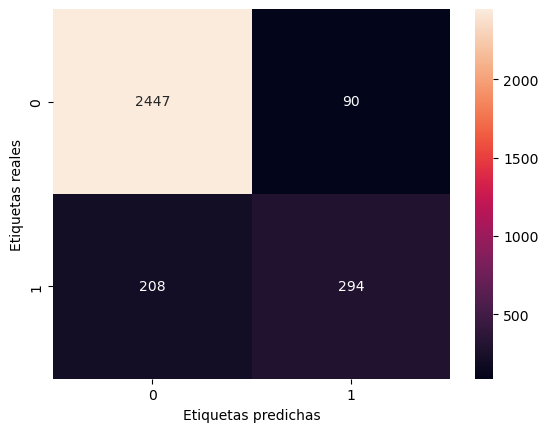

In [87]:
###Matriz de confusion
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

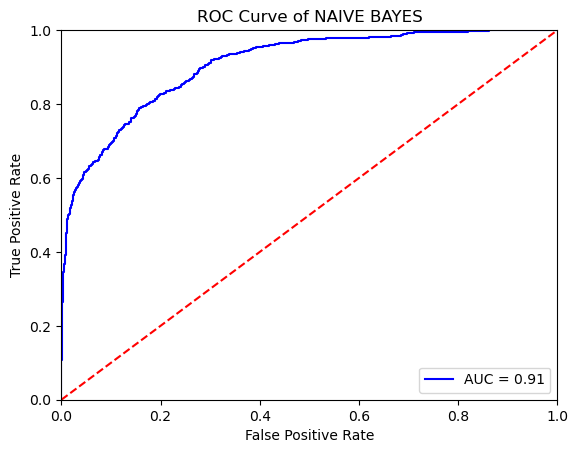

In [88]:
Y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

## KNN

In [89]:
df_test_knn = pd.concat([df_prep,
                     df.Attrition_Flag
                     ], axis = 1)
df_test_knn

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std,Attrition_Flag
0,1.0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300,0
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628,0
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764,0
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628,0
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300,0
...,...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164,0
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164,1
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628,1
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164,1


In [90]:
#Volcamos los datos a un DataFrame
dfKnn = pd.DataFrame(df_test_knn, columns=['Total_Trans_Ct_std', 'Income_Category_std','Attrition_Flag'])

dfKnn.head()

,Total_Trans_Ct_std,Income_Category_std,Attrition_Flag
0,-0.973895,0.597300,0
1,-1.357340,-0.887628,0
2,-1.911206,1.339764,0
3,-1.911206,-0.887628,0
4,-1.570365,0.597300,0


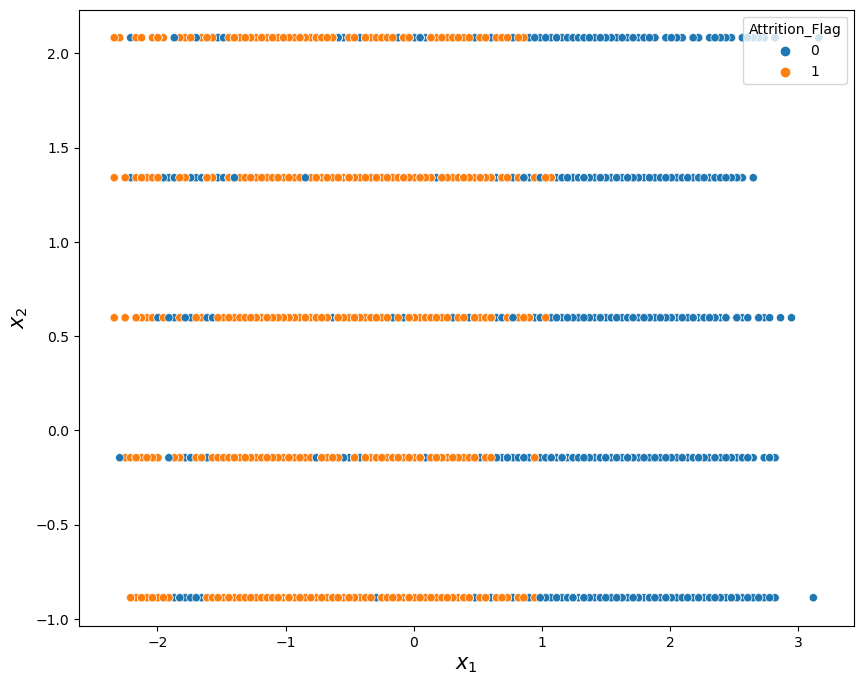

In [91]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_Trans_Ct_std', y='Income_Category_std', data=dfKnn, hue='Attrition_Flag')
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15);

In [92]:
dfKnn.groupby('Attrition_Flag')['Income_Category_std'].mean()


Attrition_Flag
0    0.005774
1   -0.030167
Name: Income_Category_std, dtype: float64

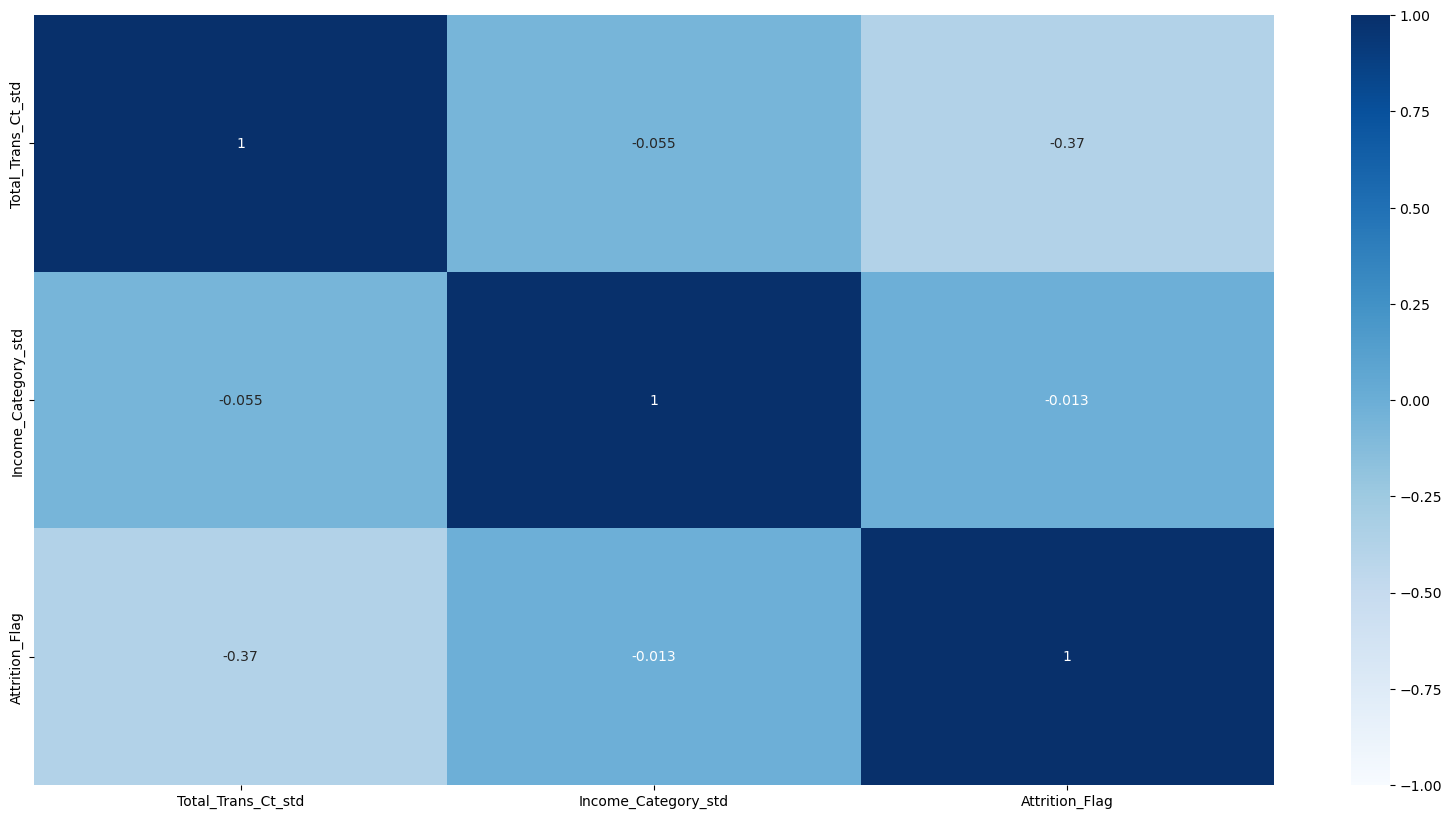

In [93]:

plt.figure(figsize=(20,10))
sns.heatmap(dfKnn.corr(), annot=True, vmin=-1, cmap='Blues');


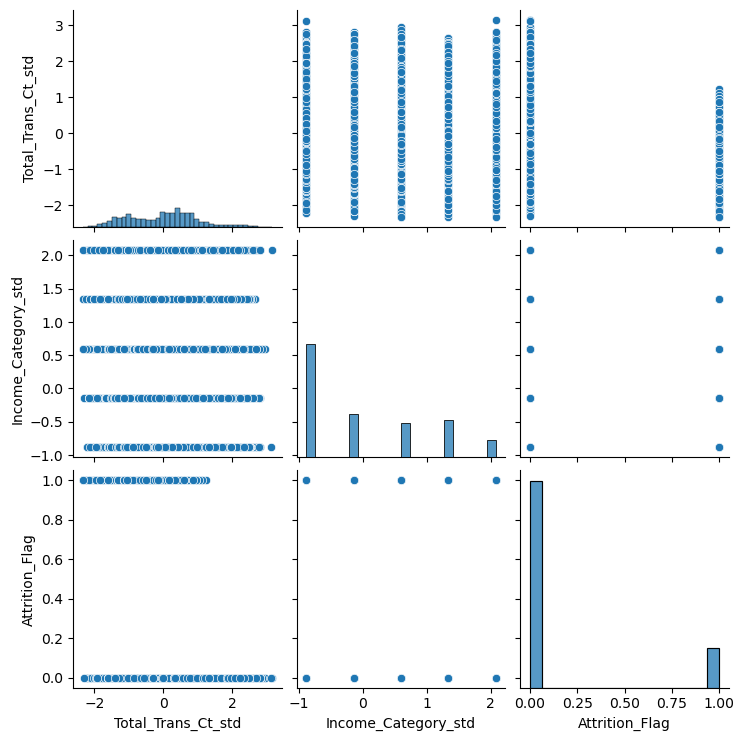

In [94]:
sns.pairplot(dfKnn);

In [95]:
# Construir la variable target: Attrition_Flag_Int
y = dfKnn['Attrition_Flag']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [96]:
X = dfKnn[['Total_Trans_Ct_std', 'Income_Category_std']]

In [97]:
# Separar los conjuntos de entrenamiento y testeo, estratificando por clase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [98]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores


In [99]:
# Probamos de 1 a 20 vecinos
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

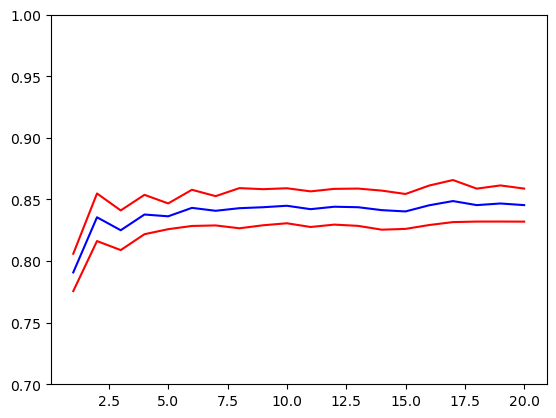

In [100]:
# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 1);

In [101]:
#Prediccion en Test
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]


,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
16,0.848716,0.01707,17,0.831647,0.865786


In [102]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

17

In [103]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [104]:
from sklearn.metrics import accuracy_score

# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train))

0.8547728768926925

In [105]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)


In [106]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]



In [107]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred)


0.8475513428120063

In [108]:
#Sensibilidad 
recall_score(y_test, y_pred)

0.2678132678132678

In [109]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.36092715231788075


In [110]:
#Especificidad
specificity = TN / (TN + FP)
print(specificity)

0.9585882352941176


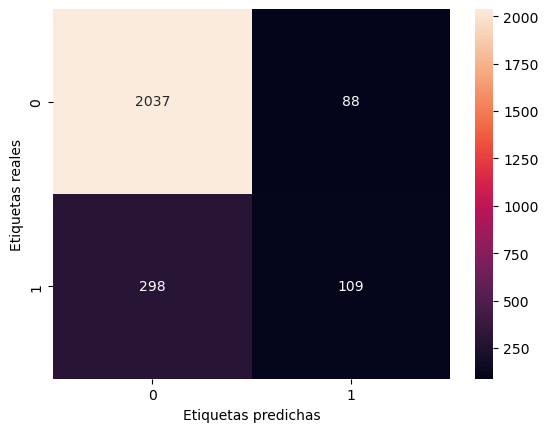

In [111]:
from sklearn.metrics import confusion_matrix

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

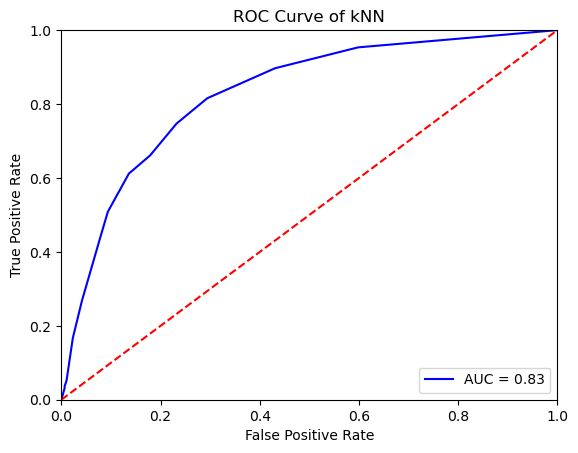

In [112]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Seleccion, conclusiones etc